In [15]:
from PIL import Image
import torchvision.transforms.functional as TF
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision.transforms as transforms

def per_image_standardization(image):
    """
    This function creates a custom per image standardization
    transform which is used for data augmentation.
    params:
        - image (torch Tensor): Image Tensor that needs to be standardized.
    
    returns:
        - image (torch Tensor): Image Tensor post standardization.
    """
    # get original data type
    orig_dtype = image.dtype

    # compute image mean
    image_mean = torch.mean(image, dim=(-1, -2, -3))

    # compute image standard deviation
    stddev = torch.std(image, axis=(-1, -2, -3))

    # compute number of pixels
    num_pixels = torch.tensor(torch.numel(image), dtype=torch.float32)

    # compute minimum standard deviation
    min_stddev = torch.rsqrt(num_pixels)

    # compute adjusted standard deviation
    adjusted_stddev = torch.max(stddev, min_stddev)

    # normalize image
    image -= image_mean
    image = torch.div(image, adjusted_stddev)

    # make sure that image output dtype  == input dtype
    assert image.dtype == orig_dtype

    return image

def shuffle_pixels(image, indicies, shape):
    image = image.reshape(4,-1)
    image = image[:,indicies]
    image = image.reshape(4,shape,shape)
    return image

class myNormalize(object):
    def __call__(self,img):
        return  per_image_standardization(img)

class myShuffle(object):
    def __init__(self, shape):
        self.indicies = torch.randperm(shape * shape)
        self.shape = shape
    def __call__(self,img):
        return  shuffle_pixels(img, self.indicies, self.shape)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [44]:
image1 = Image.open('/content/drive/MyDrive/School/Winter 2021/MIE424/MIE424H1 Final Project/Data Randomization/dog-puppy-on-garden-royalty-free-image-1586966191.jpeg')
#image1= TF.to_tensor(image1)

#image2 = Image.open('/content/96246921_281107286385265_7946140155633467392_n.png')
# image2= TF.to_tensor(image2)


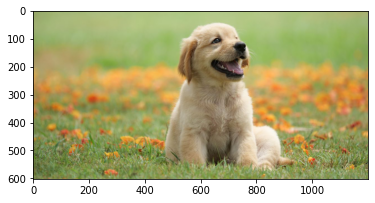

In [37]:
image1 = torch.movedim(image1, 0, -1)

plt.imshow(image1)

In [18]:
transform_Shuffle = transforms.Compose([
    transforms.Resize(32),
    transforms.CenterCrop(20),
    transforms.ToTensor(),
    myShuffle(20)
    ])

resize = transforms.Compose([
    transforms.ToTensor(),
    ])

crop = transforms.Compose([
    transforms.CenterCrop(500),
    ])

shuffle = transforms.Compose([
    myShuffle(20)
    ])

transform_Normalize = transforms.Compose([
    transforms.CenterCrop(500),
    transforms.ToTensor(),
    myNormalize()
    ])

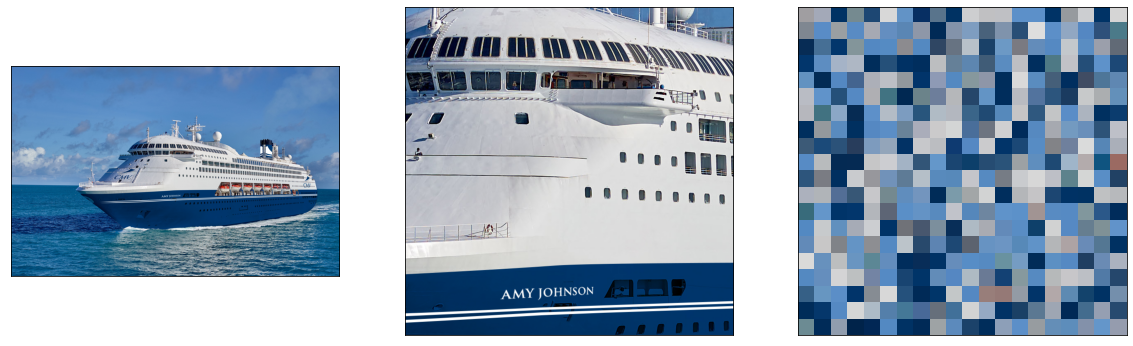

In [ ]:
plt.figure(figsize=(20,20))

image = image2

plt.subplot(1,3,1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(torch.movedim(resize(image), 0, -1))

plt.subplot(1,3,2)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(torch.movedim(crop(resize(image)), 0, -1))

plt.subplot(1,3,3)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(torch.movedim(transform_Shuffle(image), 0, -1))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


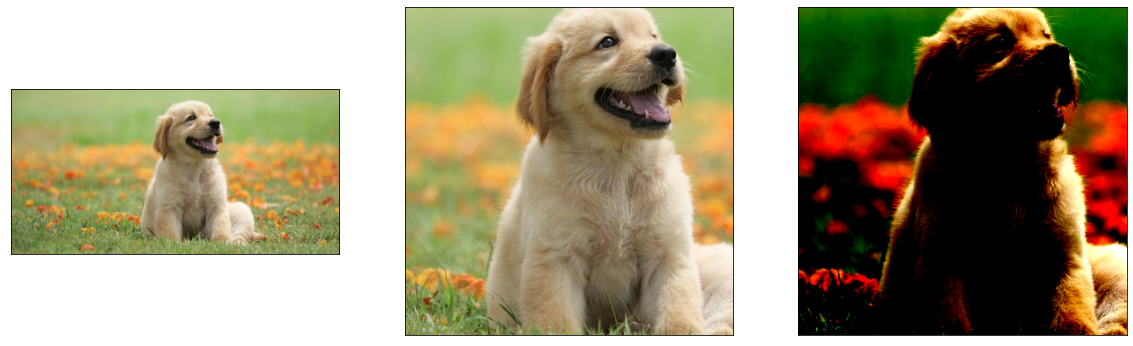

In [ ]:
plt.figure(figsize=(20,20))

image = image1

plt.subplot(1,3,1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(torch.movedim(resize(image), 0, -1))

plt.subplot(1,3,2)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(torch.movedim(crop(resize(image)), 0, -1))

plt.subplot(1,3,3)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(torch.movedim(transform_Normalize(image), 0, -1))

In [ ]:
normal = open('/content/drive/MyDrive/MIE424H1 Final Project/Data Randomization/runs/inception/LOG.normal.txt', 'r')
shuffle = open('/content/drive/MyDrive/MIE424H1 Final Project/Data Randomization/runs/inception/LOG.shuffle-both.txt', 'r')
random = open('/content/drive/MyDrive/MIE424H1 Final Project/Data Randomization/runs/inception/LOG.random.txt', 'r')

import re



t_acc = []
t_loss = []
v_acc = []
v_loss = []
for line in random:
  train_acc = re.search('Acc-tr: (.+?),', line)
  train_loss = re.search('L-tr: (.+?),', line)
  val_acc = re.search('Acc-val:  (.+?),', line)
  val_loss = re.search('L-val: (.*)', line)
  # print(val_loss)
  if train_acc:
      t_acc.append(float(train_acc.group(1).strip()))
      t_loss.append(float(train_loss.group(1).strip()))
      v_acc.append(float(val_acc.group(1).strip()))
      v_loss.append(float(val_loss.group(1).strip()))
random.close()

print(v_loss)


plt.plot([i for i in range(len(t_acc))], 
         t_acc, label = 'Train Acc')
plt.plot([i for i in range(len(t_acc))], 
         v_acc, label = 'Val Acc')
plt.legend(loc="upper left")

plt.xlabel('Epochs')
plt.ylabel('Accuracy')


plt.plot([i for i in range(len(t_loss))], 
         t_loss, label = 'Train Loss')
plt.plot([i for i in range(len(t_loss))], 
         v_loss, label = 'Val Loss')
plt.legend(loc="upper left")

plt.xlabel('Epochs')
plt.ylabel('Loss')

In [78]:

transform_ColorJitter = transforms.Compose([
    transforms.CenterCrop(500),
    transforms.ToTensor(),
    transforms.ColorJitter(10),
    #myNormalize()
    ])

transform_RandomCrop = transforms.Compose([
    transforms.CenterCrop(500),
    transforms.ToTensor(),
    transforms.RandomCrop(28, padding=12),
    #myNormalize()
    ])

transform_RandomHorizontalFlip = transforms.Compose([
    transforms.CenterCrop(500),
    transforms.ToTensor(),
    transforms.RandomHorizontalFlip(),
    #myNormalize()
    ])

transform_RandomPerspective = transforms.Compose([
    transforms.CenterCrop(500),
    transforms.ToTensor(),
    transforms.RandomPerspective(),
    #myNormalize()
    ])

transform_RandomRotation = transforms.Compose([
    transforms.CenterCrop(500),
    transforms.ToTensor(),
    transforms.RandomRotation(60),
    #myNormalize()
    ])

transform_RandomErasing = transforms.Compose([
    transforms.CenterCrop(500),
    transforms.ToTensor(),
    transforms.RandomErasing(),
    #myNormalize()
    ])

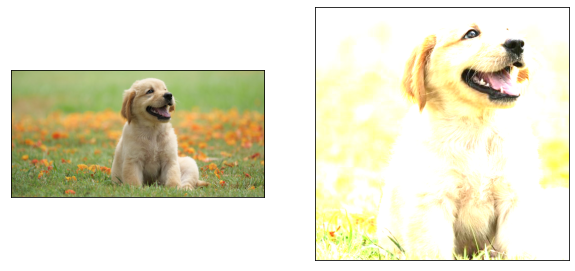

In [79]:
plt.figure(figsize=(10,10))

image1 = Image.open('/content/drive/MyDrive/School/Winter 2021/MIE424/MIE424H1 Final Project/Data Randomization/dog-puppy-on-garden-royalty-free-image-1586966191.jpeg')

image = image1

plt.subplot(1,2,1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(torch.movedim(resize(image), 0, -1))

plt.subplot(1,2,2)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(torch.movedim(transform_ColorJitter(image), 0, -1))

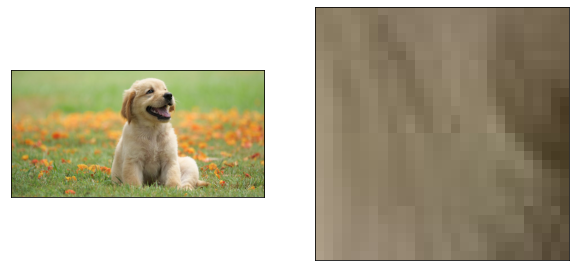

In [69]:
plt.figure(figsize=(10,10))

image1 = Image.open('/content/drive/MyDrive/School/Winter 2021/MIE424/MIE424H1 Final Project/Data Randomization/dog-puppy-on-garden-royalty-free-image-1586966191.jpeg')
image = image1

plt.subplot(1,2,1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(torch.movedim(resize(image), 0, -1))

plt.subplot(1,2,2)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(torch.movedim(transform_RandomCrop(image), 0, -1))

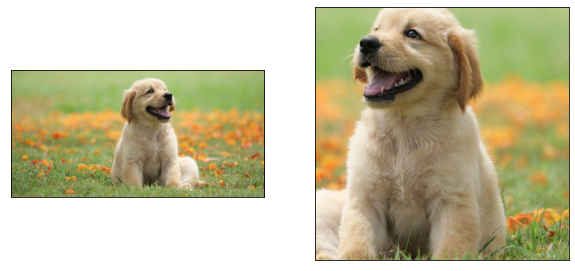

In [59]:
plt.figure(figsize=(10,10))

image1 = Image.open('/content/drive/MyDrive/School/Winter 2021/MIE424/MIE424H1 Final Project/Data Randomization/dog-puppy-on-garden-royalty-free-image-1586966191.jpeg')
image = image1

plt.subplot(1,2,1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(torch.movedim(resize(image), 0, -1))

plt.subplot(1,2,2)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(torch.movedim(transform_RandomHorizontalFlip(image), 0, -1))

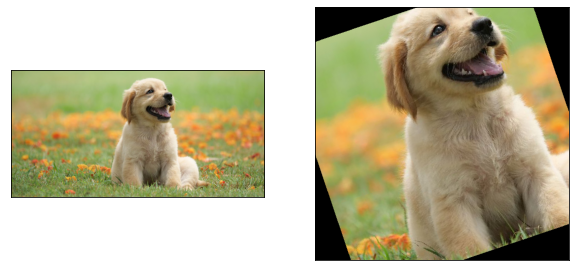

In [56]:
plt.figure(figsize=(10,10))

image1 = Image.open('/content/drive/MyDrive/School/Winter 2021/MIE424/MIE424H1 Final Project/Data Randomization/dog-puppy-on-garden-royalty-free-image-1586966191.jpeg')
image = image1

plt.subplot(1,2,1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(torch.movedim(resize(image), 0, -1))

plt.subplot(1,2,2)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(torch.movedim(transform_RandomRotation(image), 0, -1))

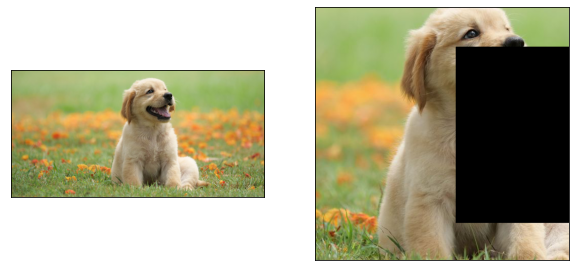

In [58]:
plt.figure(figsize=(10,10))

image1 = Image.open('/content/drive/MyDrive/School/Winter 2021/MIE424/MIE424H1 Final Project/Data Randomization/dog-puppy-on-garden-royalty-free-image-1586966191.jpeg')
image = image1

plt.subplot(1,2,1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(torch.movedim(resize(image), 0, -1))

plt.subplot(1,2,2)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(torch.movedim(transform_RandomErasing(image), 0, -1))